# Bibliotecas necesarias

In [1]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.compose import make_column_selector as Selector
from sklearn.compose import ColumnTransformer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import tree
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import AC

In [2]:
def get_data(data,target,drop):
    drop.append(target)
    # Select features and targets
    y = data[target]
    X = data.drop(columns=drop)
    # Encode the features
    X = column_transformer.transform(X)
    
    return X, y

In [3]:
def metrics_classification(y_true, y_pred):
    cm = confusion_matrix(y_true,y_pred, labels=[0,1])
    fig, ax = AC.createFigures(figsize=(8,5))
    sns.heatmap(cm, annot=True, ax=ax, fmt=".0f", annot_kws=dict(size=16, weight='bold'), cbar=False);
    ax.set_xlabel('Predicted Label');
    ax.set_ylabel('True Label');
    report = classification_report(y_true, y_pred, target_names=['Negativo','Positivo'], digits=5)
    print(report)

# Se prepara el codificador de columnas

**Se crea el codificador de columnas**

In [4]:
# Transformer to encode categorical variables, and normalize numerical variables
column_transformer = ColumnTransformer([('categories',OneHotEncoder(handle_unknown='ignore'), 
                                         Selector(dtype_include=object))],
                                       remainder=MinMaxScaler())

**Se lee el conjunto de datos completo**

In [5]:
# Read the complete data set
dataset = pd.read_csv('all_atributes/covid_data_all_atributes.csv')
dataset = dataset.drop(columns=['CONFIRMADO','DEFUNCION','RESULTADO_LAB','RESULTADO_ANTIGENO'])

In [6]:
dataset.head()

,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,FECHA_INGRESO,FECHA_SINTOMAS,...,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,TOMA_MUESTRA_LAB,TOMA_MUESTRA_ANTIGENO,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
0,FUERA DE USMER,SSA,CIUDAD DE MÉXICO,HOMBRE,CIUDAD DE MÉXICO,CIUDAD DE MÉXICO,ATOLINGA,AMBULATORIO,230,228,...,NO,NO,NO,SI,SI,NO,NO ESPECIFICADO,México,NO APLICA,NO APLICA
1,USMER,SSA,GUERRERO,HOMBRE,GUERRERO,GUERRERO,PROGRESO,HOSPITALIZADO,153,147,...,NO,NO,NO,NO,NO,NO,NO ESPECIFICADO,México,NO APLICA,NO
2,USMER,SSA,TLAXCALA,MUJER,TLAXCALA,TLAXCALA,CALERA,AMBULATORIO,184,182,...,NO,NO,NO,NO,SI,NO,NO ESPECIFICADO,México,NO APLICA,NO APLICA
3,USMER,SSA,QUERÉTARO,HOMBRE,CIUDAD DE MÉXICO,QUERÉTARO,GENERAL FRANCISCO R. MURGUÍA,AMBULATORIO,342,337,...,SI,NO,NO,NO,SI,NO,NO ESPECIFICADO,México,NO APLICA,NO APLICA
4,USMER,SSA,BAJA CALIFORNIA,MUJER,BAJA CALIFORNIA,BAJA CALIFORNIA,BENITO JUÁREZ,HOSPITALIZADO,169,163,...,SE IGNORA,SE IGNORA,SE IGNORA,NO ESPECIFICADO,NO,NO,NO ESPECIFICADO,México,NO APLICA,NO


**Se ajusta el transformador**

In [7]:
column_transformer.fit(dataset)

ColumnTransformer(remainder=MinMaxScaler(),
                  transformers=[('categories',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x13c8c9ff0>)])

**Se quita el conjunto de la memoria**

In [8]:
del dataset

# Seleccion y entrenamiento del modelo

In [9]:
model = tree.DecisionTreeClassifier(max_depth=8, criterion='entropy')

In [10]:
train_data = pd.read_csv('all_atributes/all_atributes_train_data.csv')
X_train, y_train = get_data(train_data, target='CONFIRMADO', drop=['DEFUNCION','RESULTADO_LAB','RESULTADO_ANTIGENO'])
del train_data

**Entrenamiento**

In [11]:
_ = model.fit(X_train,y_train)

# Métricas de desempeño conjunto de entrenamiento

              precision    recall  f1-score   support

    Negativo    0.70627   0.89903   0.79108   6714224
    Positivo    0.67404   0.35834   0.46792   3912332

    accuracy                        0.69996  10626556
   macro avg    0.69016   0.62868   0.62950  10626556
weighted avg    0.69441   0.69996   0.67210  10626556



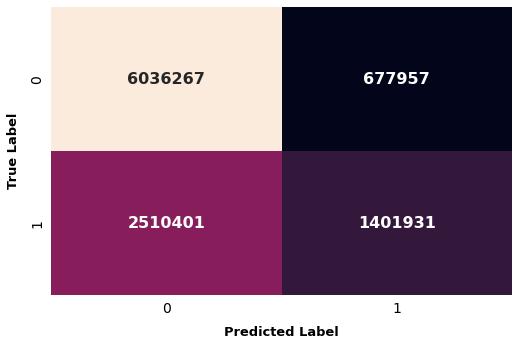

In [12]:
y_train_pred = model.predict(X_train)
# calculate the metrics
metrics_classification(y_train,y_train_pred)
del X_train, y_train, y_train_pred

# Métricas de desempeño conjunto de pruebas

In [13]:
test_data = pd.read_csv('all_atributes/all_atributes_test_data.csv')
X_test, y_test = get_data(test_data, target='CONFIRMADO', drop=['DEFUNCION','RESULTADO_LAB','RESULTADO_ANTIGENO'])
del test_data

              precision    recall  f1-score   support

    Negativo    0.70637   0.89895   0.79111   2877265
    Positivo    0.67424   0.35886   0.46841   1676974

    accuracy                        0.70008   4554239
   macro avg    0.69031   0.62890   0.62976   4554239
weighted avg    0.69454   0.70008   0.67228   4554239



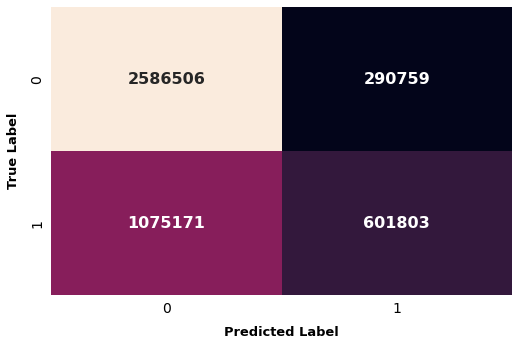

In [14]:
y_test_pred = model.predict(X_test)
# calculate the metrics
metrics_classification(y_test,y_test_pred)
del X_test, y_test, y_test_pred

In [15]:
from dtreeviz import clfviz

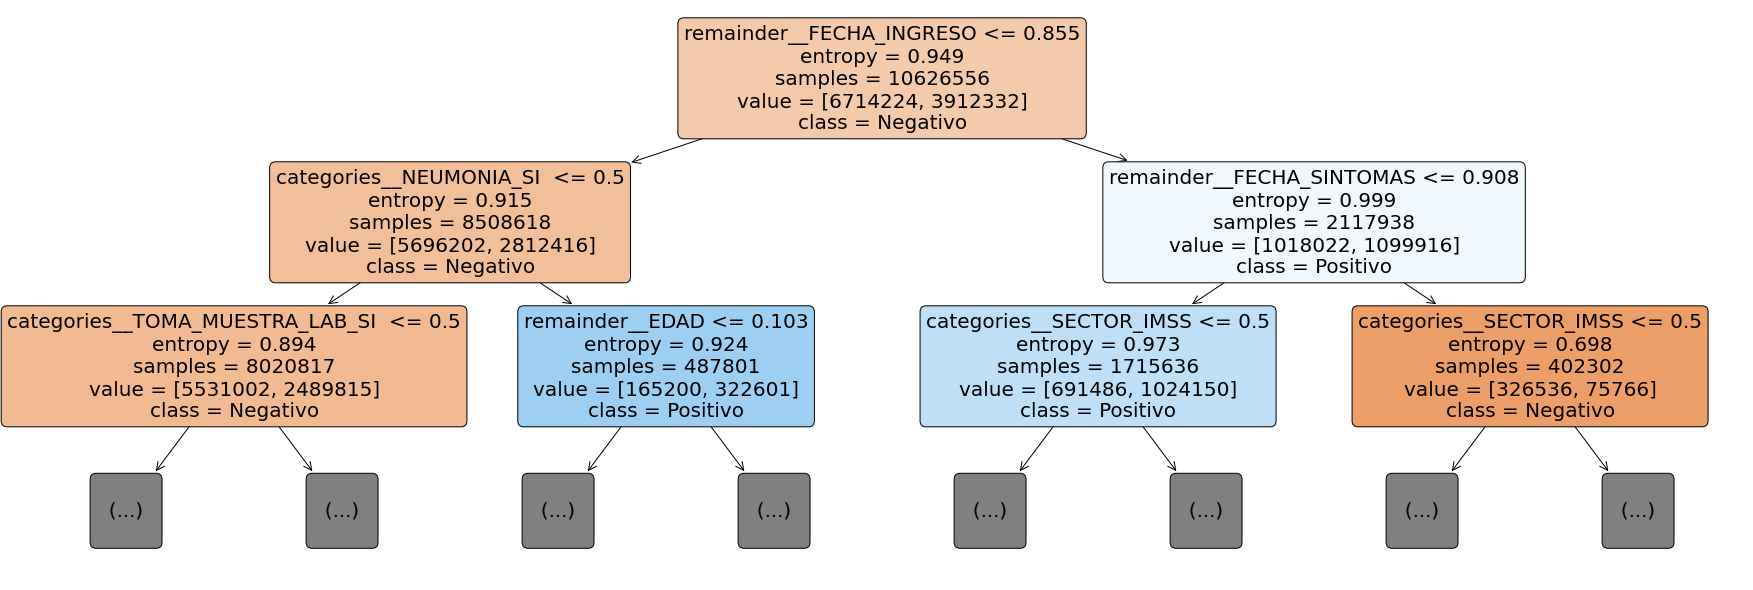

In [22]:
fig, ax = AC.createFigures(figsize=(30,10))

tree.plot_tree(model, fontsize=20, filled=True, rounded=True, ax=ax, max_depth=2, 
               feature_names=column_transformer.get_feature_names_out(), class_names=['Negativo','Positivo']);

In [17]:
index = model.feature_importances_.argsort()[-10:]
value = model.feature_importances_[index]
atribute = column_transformer.get_feature_names_out()[index]

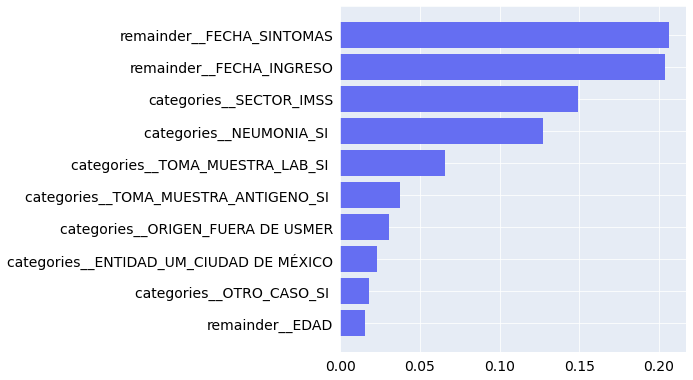

In [18]:
fig, ax = AC.createFigures()
ax.barh(atribute,value, color=AC.specialPurple);